In [1]:
from obspy import read, UTCDateTime
from obspy.geodetics import gps2dist_azimuth
import matplotlib.pyplot as plt
from prelude import *
from tqdm import trange, tqdm
import numpy as np

# Record plot of some of the stations
The plot below shows a record plot from a sample of stations, ordered in distance from the southern most station. The plot covers data from the entirefly of 2019-2-22

39it [00:56,  1.46s/it]


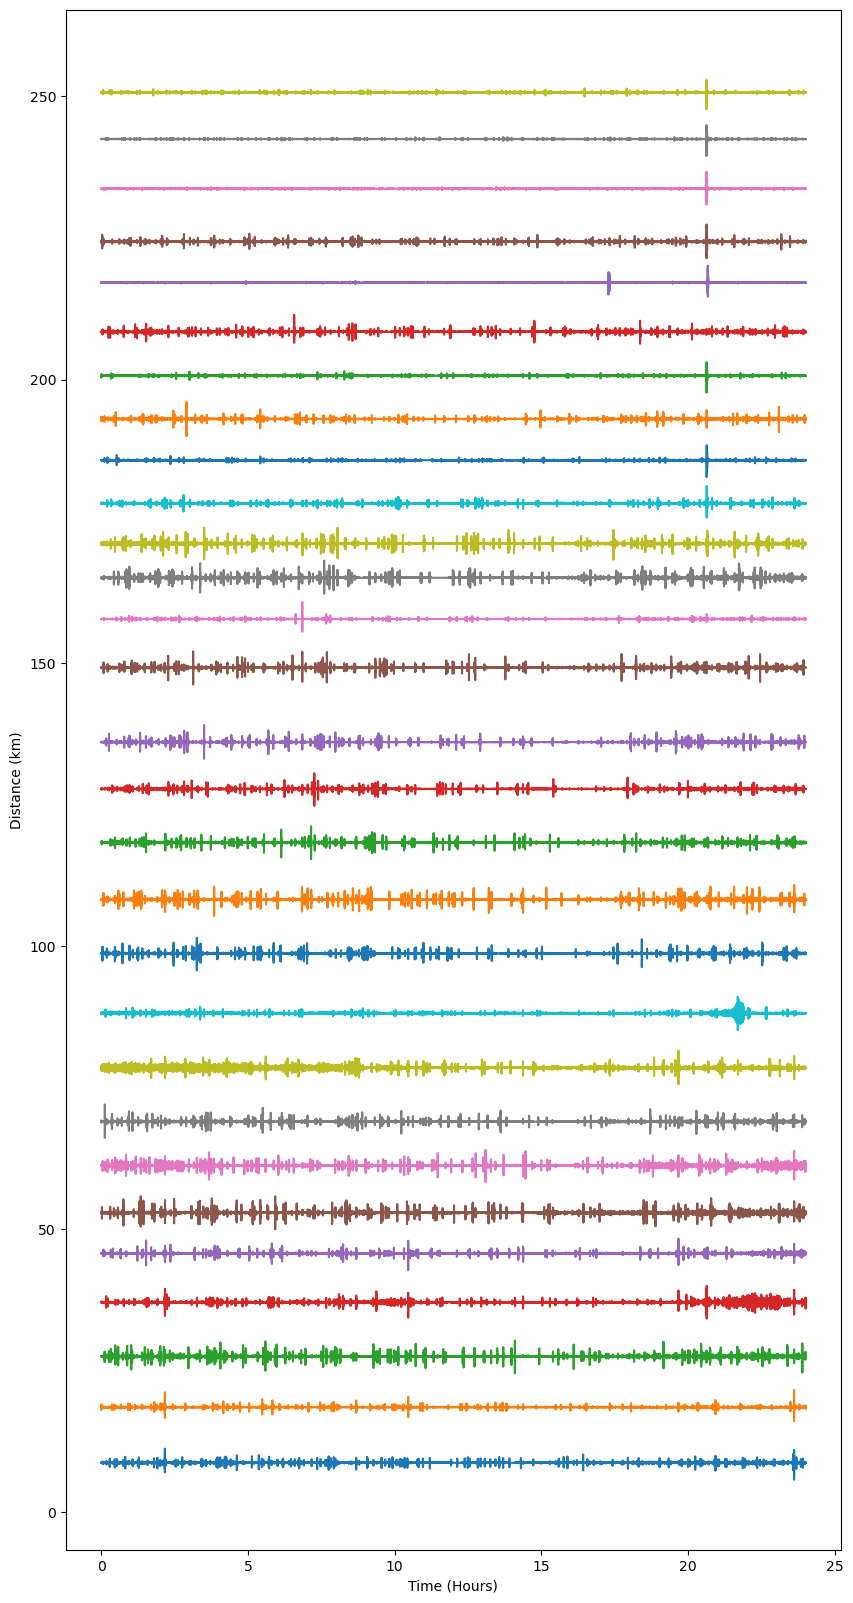

In [2]:
event_time = UTCDateTime(2019,2,22)
stations = get_stations_by_lat_lon()
start_lat=62.316507
start_lon = -150.23461
plt.figure(figsize=(10,20))
plt.ylabel("Distance (km)")
plt.xlabel("Time (Hours)")
for station in tqdm(SkipIter(stations,skip_num=10)):
    if station["station"].code not in EXCLUDE_STATIONS:
        dist_meters = gps2dist_azimuth(station["lat"],station["lon"],start_lat,start_lon)[0]
        dist_km = dist_meters/1000.0
        tr = load_day_traces(event_time,str(station["station"].code))
        tr[0].decimate(10)
        tr[0].normalize()
        data=tr[0].data
        x = np.linspace(0,24.0,num=data.shape[0])
        plt.plot(x,3.0*data+dist_km)
plt.show()
#cat = get_stream(event_time-60.0,event_time+60.0,100)